# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Шаг 1. Откройте файл с данными и изучите общую информацию

## Описание данных
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении
 Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings (action = 'ignore')
import seaborn as sns

In [2]:
# посмотрим на данные
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(20)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
7654,10,6190000.0,69.0,2017-11-11T00:00:00,3,2.50,16.0,42.000000,15,NaN,...,9.0,2.0,Санкт-Петербург,48199.0,15378.0,0.0,NaN,0.0,NaN,393.0
21559,15,3299000.0,49.0,2016-05-18T00:00:00,1,3.00,6.0,20.000000,6,NaN,...,12.0,NaN,Отрадное,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15471,6,2400000.0,44.0,2017-05-17T00:00:00,2,2.50,5.0,30.920000,4,NaN,...,6.0,1.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,40.0
13813,20,4100000.0,38.4,2017-10-05T00:00:00,1,2.65,16.0,23.500000,5,NaN,...,10.3,NaN,Санкт-Петербург,14730.0,13526.0,0.0,NaN,0.0,NaN,NaN
20427,1,12600000.0,129.0,2017-05-11T00:00:00,5,NaN,8.0,81.899994,3,False,...,14.4,1.0,Санкт-Петербург,18140.0,17143.0,1.0,1514.0,2.0,16.0,90.0


In [4]:
unique_area = data['locality_name'].unique()
print(len(unique_area))

365


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

#### Даём характеристику качеству данных
* airports_nearest — количественная
* balcony — количественная
* ceiling_height — количественная
* cityCenters_nearest - количественная
* days_exposition — количественная
* first_day_exposition - категориальная
* floor — количественная
* floors_total — количественная
* is_apartment — логическая
* kitchen_area — количественная
* last_price — количественная
* living_area — количественная
* locality_name — категориальная
* open_plan — логическая
* parks_around3000 — количественная
* parks_nearest — количественная
* ponds_around3000 — количественная
* ponds_nearest — количественная
* rooms — количественная
* studio — логическая
* total_area — количественная
* total_images — количественная

In [6]:
# сразу меняю типы данных
data['last_price']=data['last_price'].astype('int')
print(len(data))

23699


In [7]:
#смотрим где у нас пропущенные значения
data.isnull().sum(axis=0).sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

# Вывод:
### Данные можно разделить на 2 типа:
   #### Пользовательские
   * ceiling_height - 9195 пропусков, видимо, люди просто не знают высоту своих потолков
   * floors_total - 86 пропусков, видимо забыли указать
   * living_area - 1903 пропусков, люди могут не знать свою точную жил. площадь
   * is_apartment - 20924 пропуска, очевидно, что люди просто оставляли поле пустым, указываю, что это не апартаменты
   * kitchen_area - 2278 пропусков, люди могут не знать что относить к площади кухни и сочли это необязательной информацией
   * balcony - 11519 пропусков, очевидно, что люди просто оставляли поле пустым, указываю, что это балконов нет
   * locality_name - 49 пропусков, судя по количеству пропусков (очень мало), могли просто забыть указать
     
   #### Картографические данные
   * arports_nearest - 5542 пропусков
   * cityCenters_nearest - 5519 пропусков
   * parks_around3000 - 5518 пропусков
   * parks_nearest - 15620 пропусков
   * ponds_around3000 - 5518 пропусков
   * ponds_nearest - 14589 пропусков 
  
**В arports_nearest, cityCenters_nearest, ponds_around3000, parks_around3000 явно какой-то сбой в программе, которая рассчитывает.**

***Оставшиеся пропуски: parks_nearest, ponds_nearest и немного в cityCenters_nearest, airports_nearest - возможно, никакие объекты не входят в диапазон допустимых значений.***

## Шаг 2. Предобработка данных

### Обработка пропусков

##### делаем проверку на дубликаты

In [8]:
print(data.duplicated().sum())

0


### Дубликатов не найдено

In [9]:
#смотрим где у нас пропущенные значения
data.isnull().sum(axis=0).sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

In [10]:
##ceiling_height — количественная5
#floors_total — количественная
##living_area — количественная3
##is_apartment — логическая4
##kitchen_area — количественная5
##balcony — количественная2
##locality_name — категориальная3
##airports_nearest — количественная1
##cityCenters_nearest - количественная1
##parks_around3000 — количественная1
#parks_nearest — количественная
##ponds_around3000 — количественная1
#ponds_nearest — количественная
#days_exposition — количественная

In [11]:
len(data['locality_name'].unique())

365

In [12]:
#смотрим все уникальные значения посёлков/городов
town = [data['locality_name'].unique()]
for x in town:
    print (x)

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [13]:
#может если привести к нижнему регистру, то количество уникальных поселков изменится
data['locality_name'] = data['locality_name'].str.lower()
len(data['locality_name'].unique())

365

## Вывод: Дубликатов среди посёлков не обнаружилось

## airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000 - имеют примерно одинаковое количество пропусков, давайте проверим на зависимость этих данных

# ШАГ ПРОПУСКОВ 1

In [14]:
miss = 'NaN'
data.query('ponds_nearest.isna()')[['cityCenters_nearest', 'ponds_around3000', 'airports_nearest', 'parks_around3000']].isna().sum()




# строим сводную таблицу и выделяем пропущенные значения в столбце 'days_employed'
#table = pd.pivot_table(data, columns =['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_around3000'])
#bool_series = pd.isnull(data['airports_nearest'])
#data[bool_series].sample(5)

cityCenters_nearest    5519
ponds_around3000       5518
airports_nearest       5534
parks_around3000       5518
dtype: int64

### Вывод: эти данные получены автоматически, здесь проблема с загрузкой данных. Нужно сообщить отделу, который их загружал

In [15]:
#data['airports_nearest'].fillna(value = data.groupby(['locality_name'])['airports_nearest'].transform('median'), inplace = True)

In [16]:
#data.isnull().sum(axis=0)
#data['cityCenters_nearest'].fillna(value = data.groupby(['locality_name'])['airports_nearest'].transform('median'), inplace = True)

# ШАГ ПРОПУСКОВ 2

In [17]:
# заполняем пропущенные значения в 'balcony' нулями, потому что скорее всего балкона просто нет
data['balcony'].fillna(0, inplace=True)

# ШАГ ПРОПУСКОВ 3

In [18]:
# строим сводную таблицу и выделяем пропущенные значения в столбце 'days_employed'
#table3 = pd.pivot_table(data, columns =['locality_name', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000'])
bool_series = pd.isnull(data['locality_name'])
data[bool_series].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,NaN,...,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.60,2,NaN,...,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.60,3,NaN,...,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.10,21,NaN,...,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000,46.5,2016-05-28T00:00:00,2,NaN,5.0,30.80,5,NaN,...,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000,89.5,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,NaN,...,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000,80.0,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,...,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000,83.0,2015-08-14T00:00:00,3,NaN,7.0,NaN,6,NaN,...,NaN,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000,85.5,2016-01-20T00:00:00,3,NaN,7.0,59.10,5,False,...,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000,30.0,2016-04-29T00:00:00,1,NaN,24.0,20.00,23,NaN,...,NaN,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


In [19]:
# никаких зависимостей не видно, поэтому пропуски в данных 'locality_name' полностью случайные, удалим их
data.dropna(subset=['locality_name'], inplace=True)
data['locality_name'].isnull().sum()

0

# ШАГ ПРОПУСКОВ 4

In [20]:
print(data.query('is_apartment == True'))

       total_images  last_price  total_area first_day_exposition  rooms  \
543              11    12790000       56.60  2018-11-06T00:00:00      2   
916              11     8183000       70.00  2018-01-11T00:00:00      2   
1109              1    34878556       95.80  2014-12-09T00:00:00      2   
1608             12     2150000       20.10  2019-01-30T00:00:00      1   
2759             11     7500000      152.00  2018-07-27T00:00:00      3   
2975              9     4931398       42.90  2018-07-23T00:00:00      1   
3067             13     6600000       95.00  2018-09-08T00:00:00      2   
3816              4     4779000       53.10  2016-05-16T00:00:00      1   
3951             10     4300000       50.00  2019-04-20T00:00:00      1   
4339             19     6900000       72.00  2019-03-25T00:00:00      3   
5076              0     3850000       30.50  2018-10-03T00:00:00      1   
5297             19    45000000       96.00  2018-11-15T00:00:00      2   
5654             20     9

In [21]:
#заменяем все пропущенные значения в 'is_apartment' на False,
#потому что столбец относится к пользовательским данным, пользователи просто не указывали этот пункт, потому что их имущество не является апартаментами
data['is_apartment'].fillna(False, inplace=True)


In [22]:
data['is_apartment'].isnull().sum()

0

In [23]:
data.sample(29)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
7444,20,68000000,221.00,2017-09-27T00:00:00,5,NaN,4.0,145.00,4,False,...,10.00,1.0,санкт-петербург,20779.0,1253.0,1.0,302.0,3.0,29.0,73.0
4335,8,3800000,46.30,2017-09-13T00:00:00,2,NaN,9.0,29.00,2,False,...,7.00,0.0,санкт-петербург,33521.0,11218.0,1.0,649.0,1.0,761.0,84.0
22780,20,10600000,58.81,2017-07-11T00:00:00,2,2.80,14.0,29.52,8,False,...,10.56,2.0,санкт-петербург,19008.0,3953.0,0.0,NaN,1.0,69.0,99.0
18244,14,3500000,41.70,2016-04-29T00:00:00,3,NaN,5.0,29.80,3,False,...,5.40,0.0,санкт-петербург,11413.0,15779.0,0.0,NaN,1.0,332.0,259.0
7389,4,16000000,168.60,2017-08-17T00:00:00,6,NaN,5.0,117.00,5,False,...,23.00,0.0,санкт-петербург,25393.0,4096.0,1.0,247.0,1.0,656.0,412.0
18055,0,3500000,50.00,2017-11-17T00:00:00,4,NaN,5.0,38.00,1,False,...,5.40,0.0,санкт-петербург,12682.0,13226.0,0.0,NaN,0.0,NaN,45.0
14052,19,14750000,92.60,2019-03-22T00:00:00,4,3.40,6.0,56.50,5,False,...,13.50,0.0,санкт-петербург,24493.0,3042.0,1.0,690.0,3.0,611.0,NaN
9068,13,4800000,50.70,2017-05-26T00:00:00,2,NaN,5.0,29.00,4,False,...,6.80,1.0,сестрорецк,58361.0,35290.0,1.0,591.0,2.0,223.0,171.0
21787,8,5700000,46.00,2017-09-20T00:00:00,1,NaN,24.0,20.60,2,False,...,13.20,0.0,санкт-петербург,44754.0,8409.0,1.0,609.0,0.0,NaN,15.0
1336,12,18500000,66.00,2017-06-08T00:00:00,1,3.00,7.0,25.00,7,False,...,35.00,1.0,санкт-петербург,NaN,NaN,NaN,NaN,NaN,NaN,130.0


# ШАГ 5

In [24]:
# в современных домах потолки выше, чем в хрущёвках, поэтому заменяем пропущенные значения в столбце 'ceiling_height' на среднюю высоты потолков  в домах с таким эе количетвом этажей
data['ceiling_height'].fillna(value = data.groupby(['floors_total'])['ceiling_height'].transform('median'), inplace = True)
# площадь кухни зависит от площади квартиры, поэтому поэтому заменяем пропущенные значения в столбце 'kitchen_area' на среднюю кухонь  с похожец площадью жилья
data['kitchen_area'].fillna(value = data.groupby(['living_area'])['kitchen_area'].transform('median'), inplace = True)
data.isnull().sum(axis=0).sort_values()

total_images                0
locality_name               0
balcony                     0
open_plan                   0
is_apartment                0
floor                       0
studio                      0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
ceiling_height             77
floors_total               85
kitchen_area             1524
living_area              1898
days_exposition          3180
parks_around3000         5510
ponds_around3000         5510
cityCenters_nearest      5511
airports_nearest         5534
ponds_nearest           14565
parks_nearest           15586
dtype: int64

## Комментарий: можно заметить, что у нас остались пропуски в ceiling_height, что значит в этих строках нет данных о floors_total. Пропусков мало, поэтому просто удаляем эти строки

In [25]:
data.dropna(subset=['ceiling_height'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)

In [27]:
data.isnull().sum(axis=0).sort_values()

total_images                0
locality_name               0
balcony                     0
open_plan                   0
is_apartment                0
floor                       0
studio                      0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
floors_total                0
kitchen_area             1488
living_area              1865
days_exposition          3171
parks_around3000         5500
ponds_around3000         5500
cityCenters_nearest      5501
airports_nearest         5524
ponds_nearest           14529
parks_nearest           15534
dtype: int64

In [28]:
# заменяем пропущенные значения 'living_area' и 'kitchen_area' пропущенными значениями
data['living_area'].fillna(value = data.groupby(['locality_name', 'last_price'])['living_area'].transform('median'), inplace = True)
data['kitchen_area'].fillna(value = data.groupby(['living_area', 'last_price'])['kitchen_area'].transform('median'), inplace = True)
# остались ещё пропущенные значения, их немного, поэтому просто удаляем их
data.dropna(subset=['living_area'], inplace=True)
data.dropna(subset=['kitchen_area'], inplace=True)
data.isnull().sum(axis=0).sort_values()
#living_kitchen = pd.pivot_table(data, columns =['kitchen_area', 'living_area'])
#living_kitchen.sample(15)

total_images                0
locality_name               0
balcony                     0
kitchen_area                0
open_plan                   0
is_apartment                0
floor                       0
studio                      0
floors_total                0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
living_area                 0
days_exposition          3062
parks_around3000         5060
ponds_around3000         5060
cityCenters_nearest      5061
airports_nearest         5083
ponds_nearest           13887
parks_nearest           14829
dtype: int64

In [30]:
b = data.groupby('rooms').agg({'living_area': 'median', 'kitchen_area': 'median', 'total_area': 'median'})

b['kitchen_coeff'] = (b['kitchen_area']/b['total_area']).round(2)
b['living_coeff'] = (b['living_area']/b['total_area']).round(2)
b

,living_area,kitchen_area,total_area,kitchen_coeff,living_coeff
rooms,,,,,
0,18.00,9.00,26.00,0.35,0.69
1,17.70,9.00,36.50,0.25,0.48
2,30.50,8.70,53.00,0.16,0.58
3,44.70,9.50,72.40,0.13,0.62
4,63.05,11.20,98.05,0.11,0.64
5,90.60,15.00,145.00,0.10,0.62
6,123.60,19.50,188.00,0.10,0.66
7,145.00,20.00,213.50,0.09,0.68
8,162.00,23.60,235.00,0.10,0.69


In [31]:
b.loc[0][4]

0.69

In [32]:
def find_area(row, k):

    # берем текущю общую площадь и находим в таблице b текующую комнату. Все.
    return row['total_area'] * b.loc[row['rooms']][k]

# Сохраняю в новый столбец.
data['new_data'] = data.apply(lambda row: find_area(row, 4), 1)

# Заполняю пропуски через новый столбец.
data['living_area'] = data['living_area'].fillna(data['new_data'])
display(data.head())
data.living_area.isna().sum()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_data
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,66.960
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.75,11.0,18.6,1,False,...,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,19.392
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.55,5.0,34.3,4,False,...,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,32.480
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,58.000
5,10,2890000,30.4,2018-09-10T00:00:00,1,2.65,12.0,14.4,5,False,...,0.0,городской посёлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,14.592


0

In [33]:
data['living_area'] = data['living_area'].fillna(data.apply(lambda row: (row['total_area'] * b.loc[row['rooms']][4]), 1))

In [34]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
#data.sample(3)


# Шаг 3. Посчитайте и добавьте в таблицу

* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [35]:
#цена квадратного метра
data['price_square_meter'] = data['last_price'] / data['total_area'].map('{:.2f}'.format).astype(float)

In [36]:
# день недели
data['weekday'] = data['first_day_exposition'].dt.weekday_name
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
# категоризируем этажи на 'последний', 'первый', 'другой'. Написали функцию и применили к data
def category_of_floor(table):
    floor = table['floor']
    floor_total = table['floors_total']
    if floor == floor_total:
        return 'последний'
    if floor == 1:
        return 'первый'
    return 'другой'
data['floor_n'] = data.apply(category_of_floor, axis = 1)

In [37]:
#def category_of_floor2(table):
#    floor = table['floor']
#    floor_total = table['floors_total']
#    if floor == floor_total:
#        return 'последний'
#    if floor > floors_total:
#        return 'не существует'
#    if floor == 1:
#        return 'первый'
#    if floor > floors_total:
#        return 'не существует'
#    return 'другой'
#data['floor_n'] = data.apply(category_of_floor2, axis = 1)

In [38]:
data.sample(7)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_data,price_square_meter,weekday,month,year,floor_n
3868,17,3950000,46.0,2018-10-13,1,2.75,17.0,22.2,15,False,...,NaN,NaN,NaN,93.0,22.080,85869.565217,Saturday,10,2018,другой
8346,18,2200000,36.2,2017-01-18,1,2.55,5.0,17.2,1,False,...,NaN,NaN,NaN,631.0,17.376,60773.480663,Wednesday,1,2017,первый
20316,7,4142016,65.0,2016-04-24,3,2.60,14.0,30.0,6,False,...,NaN,NaN,NaN,72.0,40.300,63723.323077,Sunday,4,2016,другой
3506,14,3695000,42.0,2018-06-25,1,2.75,25.0,18.2,17,False,...,NaN,NaN,NaN,161.0,20.160,87976.190476,Monday,6,2018,другой
16560,10,7002000,46.8,2015-04-06,1,2.70,13.0,13.9,3,False,...,706.0,3.0,606.0,519.0,22.464,149615.384615,Monday,4,2015,другой
68,11,4150000,74.0,2017-08-04,3,2.80,5.0,44.0,1,False,...,NaN,NaN,NaN,234.0,45.880,56081.081081,Friday,8,2017,первый
2678,6,6350000,43.4,2015-04-29,1,2.75,20.0,18.1,15,False,...,173.0,3.0,196.0,492.0,20.832,146313.364055,Wednesday,4,2015,другой


In [39]:
#соотношение жилой и общей площади
data['living_area/total_area'] = data['living_area'] / data['total_area'].map('{:.2f}'.format).astype(float)

In [40]:
#отношение площади кухни к общей
data['kitchen_area/total_area'] = data['kitchen_area'] / data['total_area'].map('{:.2f}'.format).astype(float)

# Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

## 1)Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

count    22645.0
mean         2.0
std          1.0
min          0.0
25%          1.0
50%          2.0
75%          3.0
max         19.0
Name: rooms, dtype: float64

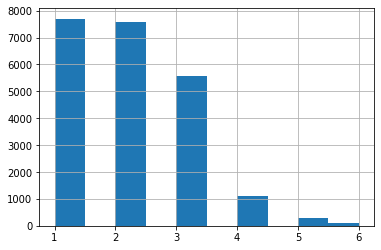

In [41]:
data['rooms'].hist(bins=10, range = (1, 6))
data['rooms'].describe().round()

**однокомнатных и двухкомнатных помещений больше всего, здесь вопросов не возникает.**

In [42]:
#data['last_price'].hist()
data['last_price'].describe().round()

count        22645.0
mean       6502652.0
std       10820556.0
min          12190.0
25%        3450000.0
50%        4650000.0
75%        6750000.0
max      763000000.0
Name: last_price, dtype: float64

#### явно есть какие-то ошибки в данных, не бывает квартир за 12190 рублей. Стандартное отклонение слишком большое, можно будет сделать какие-то выводы только по гистрограмме.

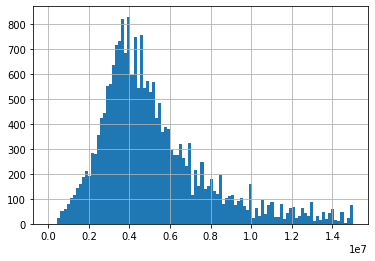

In [43]:
#data.boxplot(column = 'last_price', by = 'locality_name')

data['last_price'].hist(bins = 100
                        , range = (0,15000000))

#### Больше всего квартир от 3 до 5 миллионов рублей

In [44]:
data['ceiling_height'].describe().round()

count    22645.0
mean         3.0
std          1.0
min          1.0
25%          3.0
50%          3.0
75%          3.0
max        100.0
Name: ceiling_height, dtype: float64

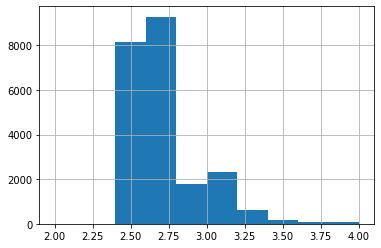

In [45]:
data['ceiling_height'].hist(bins = 10, range=(2, 4))

#### больше всего потолков высотой примерно 2.75 м, что нормально

In [46]:
data['total_area'].describe().round()

count    22645.0
mean        60.0
std         35.0
min         12.0
25%         40.0
50%         52.0
75%         69.0
max        900.0
Name: total_area, dtype: float64

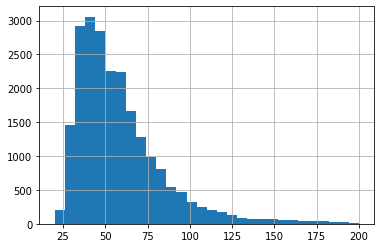

In [47]:
data['total_area'].hist(bins = 30, range=(20, 200))

#### Больше всего квартир от 30 до 70 м^2. Это соответствует 1 и 2 комнатным квартирам.

## 2)Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [48]:
data['days_exposition'].describe().round()

count    19583.0
mean       183.0
std        220.0
min          1.0
25%         45.0
50%         98.0
75%        234.0
max       1580.0
Name: days_exposition, dtype: float64

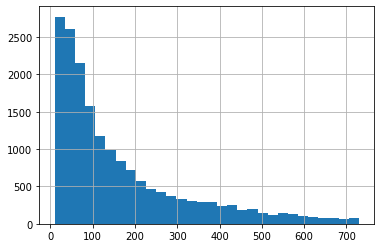

In [49]:
data['days_exposition'].hist(bins = 30, range=(10, 730))

In [50]:
days_median = data['days_exposition'].median()
days_mean = data['days_exposition'].mean()
print('среднее значение:', '{:.1f}'.format(days_mean))
print('медианное значение:', '{:.1f}'.format(days_median))

среднее значение: 182.7
медианное значение: 98.0


(0, 1600)

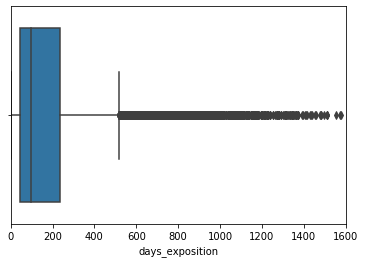

In [51]:
#plot = data.boxplot(days_exposition, by='days_exposition',figsize=(10,10)).set_ylim(0,200000)
#plt.ylim(1,1000)

#plt.xlim(1,20518)
sns.boxplot('days_exposition', data=data)
plt.xlim(0,1600)

### Вывод: больше 500 дней считаем, что продажи шли необычно долго

(0, 50)

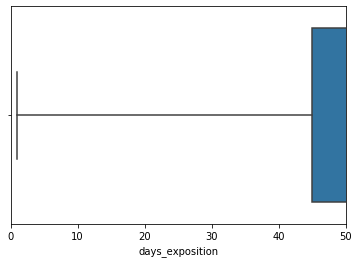

In [52]:
sns.boxplot('days_exposition', data=data)
plt.xlim(0,50
        )

### Вывод: меньше 45 дней считаем, что продажи шли необычно быстро

### Общий вывод: продажа обычно занимает 98 дней, не учитывая выбивающие значения

(510, 520)

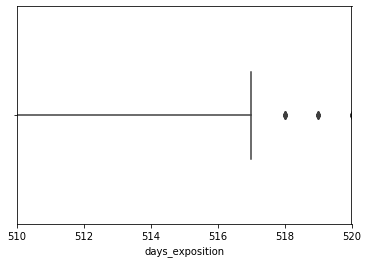

In [53]:
sns.boxplot('days_exposition', data=data)
plt.xlim(510,520)

# Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

90.0     162
74.0     106
54.0     106
61.0     104
59.0     102
        ... 
221.0     15
227.0     15
236.0     15
242.0     12
243.0      8
Name: days_exposition, Length: 199, dtype: int64

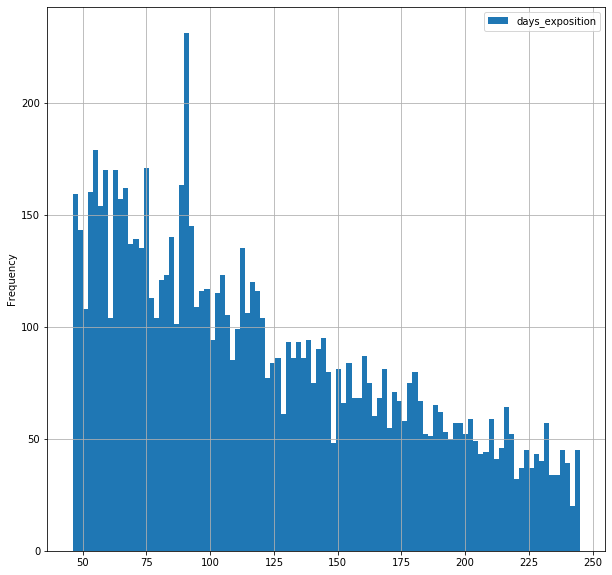

In [54]:
#оставляем только то, что у нас входит в межквартильный размах
#data_else = data.query('days_exposition >= 45 and days_exposition <= 245')
# Убираем выбивающие значения 60, 45 и 90
number = 90
data_else = data.query('(days_exposition != 60 and days_exposition != 90) and (days_exposition >= 46 and days_exposition <= 245)')
data_else.plot(y = 'days_exposition', bins = 100, kind = 'hist', grid = True, figsize = (10,10))
data_else['days_exposition'].value_counts().sort_values(ascending = False)
#data_else['days_exposition'].describe()

### Вывод: Спрос на жильё растёт, поэтому рано или поздно квариты продаются, либо владельцы снимают с продажи.

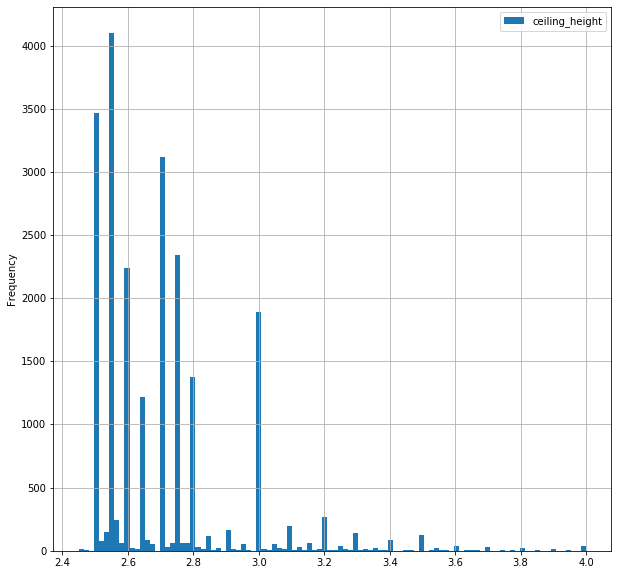

In [55]:
#data_else['ceiling_height'].describe()
#sns.boxplot('ceiling_height', data=data)
#plt.xlim(2.2,7)
# Убираю редкие значения в 'ceiling_height'
data_else = data.query('2.4 < ceiling_height <= 4')
data_else.plot(y = 'ceiling_height', bins = 100, kind = 'hist', grid = True,  figsize = (10,10))

In [56]:
data['ceiling_height'].value_counts().sort_values(ascending=False).head(10)


2.55    4099
2.50    3431
2.70    3105
2.75    2285
2.60    2228
3.00    1890
2.80    1376
2.65    1138
3.20     270
3.10     196
Name: ceiling_height, dtype: int64

**Вывод: Существует много измерений потолков, величины которых встречаются меньше 250 раз, скорее всего владельцы квартир ошиблись при измерении, поэтому эти данные можем считать ошибочными**

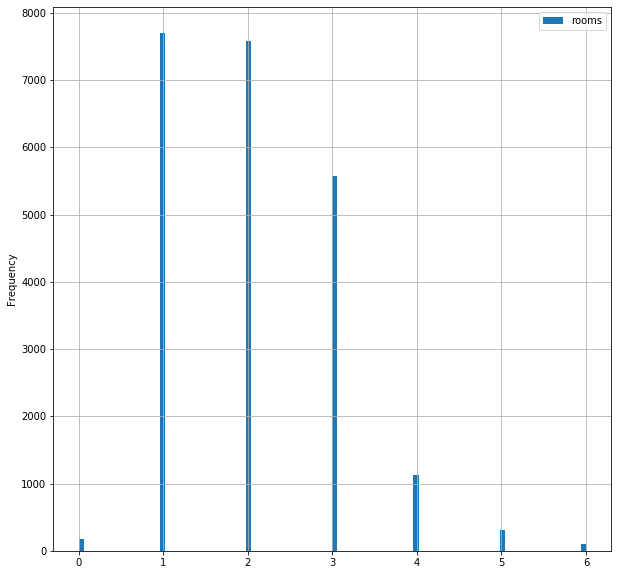

In [57]:
data_else['rooms'].describe()
data_else = data.query('0 <= rooms <= 6')
data_else.plot(y = 'rooms', bins = 100, kind = 'hist', grid = True,  figsize = (10,10))
#sns.boxplot('rooms', data=data)
#plt.xlim(0, 6)

In [93]:
data_else['total_area'].describe()
data_else['total_area'].value_counts().sort_values(ascending=False).head(100)

45.0    407
42.0    362
60.0    335
31.0    331
44.0    330
       ... 
44.8     35
31.4     35
45.3     34
41.3     34
44.3     34
Name: total_area, Length: 100, dtype: int64

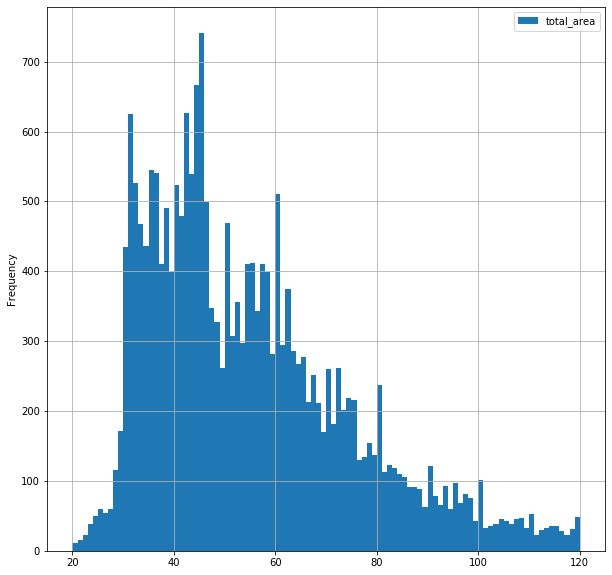

In [97]:
data_else = data.query('20 <= total_area <= 120')
data_else.plot(y = 'total_area', bins = 100, kind = 'hist', grid = True,  figsize = (10,10))
#sns.boxplot('total_area', data=data)
#plt.xlim(15, 175)

# Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019278E7D408>,
      dtype=object)

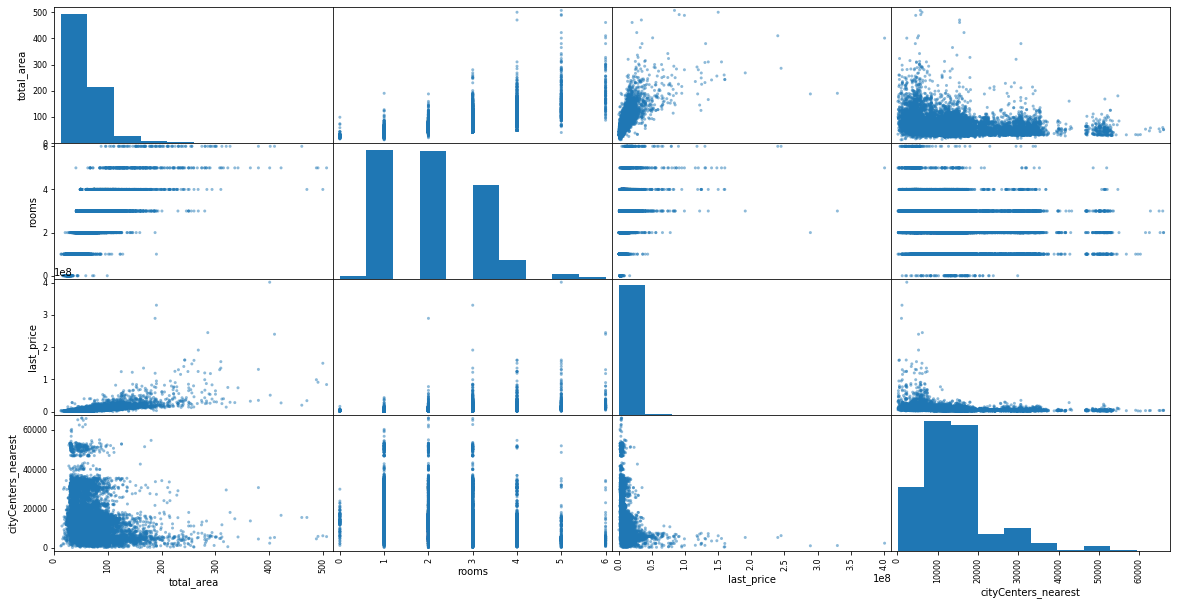

In [61]:
#total_area_price = data.pivot_table(index='total_area', values='last_price')
#total_area_price['last_price'].round().sort_values(ascending = False)


#data_query_locality = data.query('locality_name == Санкт-Петербург')
#total_area_price = data_query_locality.pivot_table(index=['last_price', 'locality_name'] , values='total_area')
#total_area_price['total_area'].round().sort_values(ascending =True).head(10)

# строим матрицу по которой будем делать визуальные выводы
data_matrix = data_else[['total_area', 'rooms', 'last_price', 'cityCenters_nearest']]
pd.plotting.scatter_matrix(data_matrix, figsize=(20, 10))




### Вывод: Цена имеет сильную зависимость от площади, чем больше площадь, тем выше цена. Цена косвенно зависит от количества комнат, потому что количество комнат зависит от площади. Квартиры в радиусе 10 км от центра значительно дороже остальных

In [100]:
#строим сводную таблицу, чтобы увидеть как зависит цена от этажа
floor_price = data_else.pivot_table(index='floor_n', values='last_price')
floor_price['last_price'].round().sort_values(ascending = False)
#data['weekday'].sample(10)

floor_n
другой       5636698.0
последний    5010245.0
первый       4395441.0
Name: last_price, dtype: float64

### Вывод: на последнем или на каком-нибудь другом этаже квартиры дороже, чем на первом. Самые дорогие квартиры не на первом и не на поседнем.

In [101]:
##def replace_weekday(table):
#for row in data['weekday']:
#    if row == 'Monday':
#        data['weekday'] = 1
#    if row == 'Tuesday':
#        data['weekday'] = 2
#    if row == 'Wednesday':
#        data['weekday'] = 3
#    if row == 'Thursday':
#        data['weekday'] = 4
#    if row == 'Friday':
#        data['weekday'] = 5
#    if row == 'Saturday':
#        data['weekday'] = 6
#    if row == 'Sunday':
#        data['weekday'] = 7
##data['weekday_number'] = data['weekday'].apply(replace_weekday)
##time_matrix = data[['month','year', 'weekday', 'last_price']]
##pd.plotting.scatter_matrix(time_matrix, figsize=(20, 10))
data_else['weekday'].sample(5)

19078     Tuesday
16196    Saturday
18095      Monday
12360    Saturday
22324      Friday
Name: weekday, dtype: object

(0, 17000000)

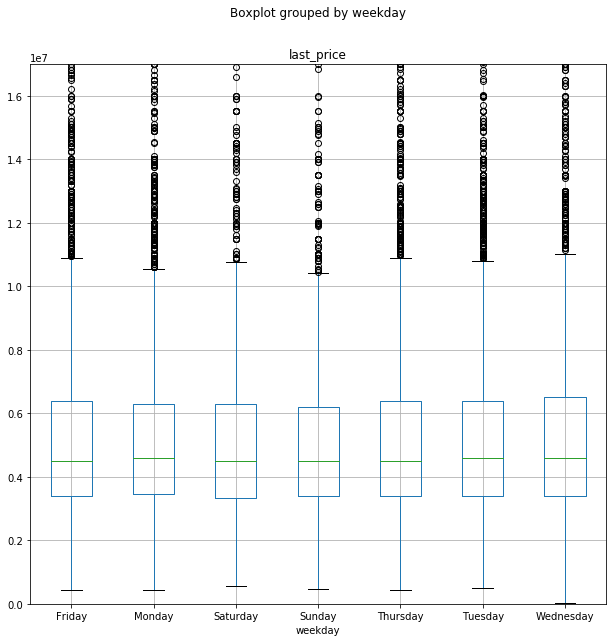

In [103]:
# как зависит цена от дня недели размещения объявления
data_else.boxplot('last_price', by='weekday',figsize=(10,10)).set_ylim(0,17000000)

(0, 17000000)

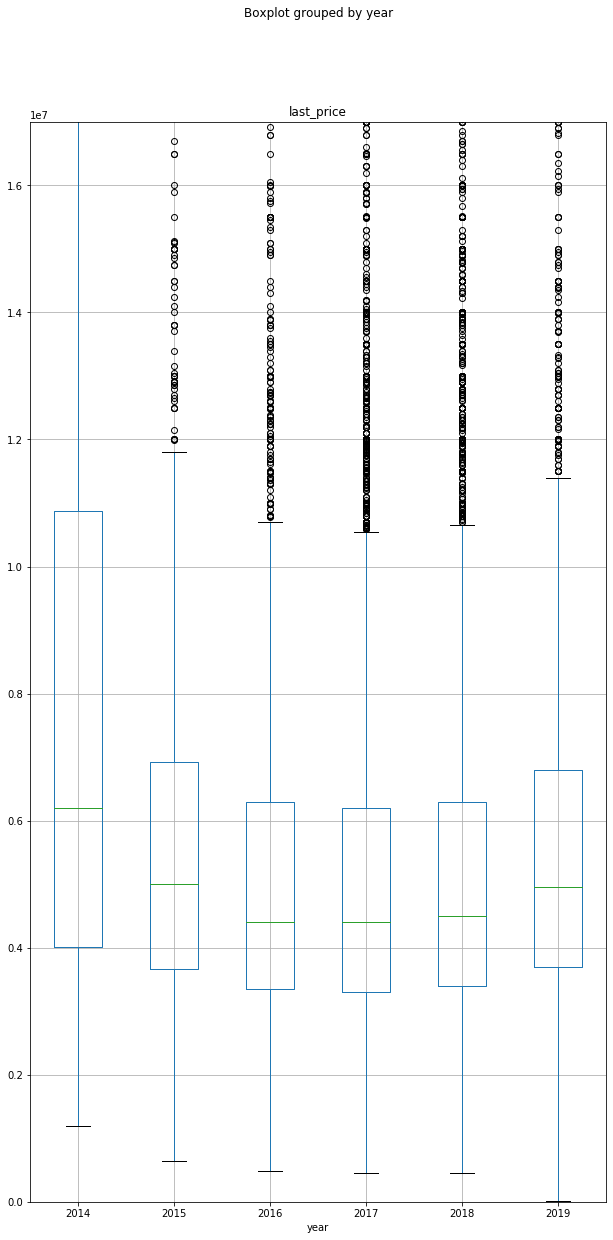

In [104]:
# как зависит цена от года размещения объявления
data_else.boxplot('last_price', by='year',figsize=(10,20)).set_ylim(0,17000000)

## В связи с макроэкономическими показателями цена на недвижимость резко упала в 2015

(0, 17000000)

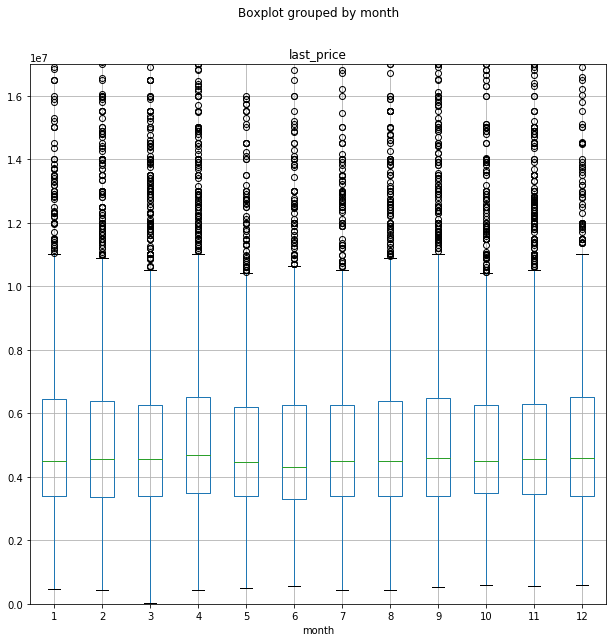

In [105]:
# как зависит цена от месяца размещения объявления
data_else.boxplot('last_price', by='month',figsize=(10,10)).set_ylim(0,17000000)

# Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.


In [106]:
# 10 насёленных пунктов с наибольшим количеством объявлений
data_else['locality_name'].value_counts().head(10)

санкт-петербург      14328
посёлок мурино         471
посёлок шушары         422
всеволожск             386
пушкин                 338
колпино                330
посёлок парголово      307
гатчина                299
деревня кудрово        278
выборг                 209
Name: locality_name, dtype: int64

In [107]:
# записываем населённые пункты в внешние переменные
name_city_Petersburg = 'санкт-петербург'
name_city_murino = 'посёлок мурино'
name_city_shushary = 'посёлок шушары'
name_city_vsevolozhsk = 'всеволожск'
name_city_pushkin = 'пушкин'
name_city_kolpino = 'колпино'
name_city_pargolovo = 'посёлок парголово'
name_city_gatchina = 'гатчина'
name_city_kudrovo = 'деревня кудрово'
name_city_vyborg = 'выборг'
square_meter = data_else.query('locality_name == @name_city_Petersburg or locality_name == @name_city_murino or locality_name == @name_city_shushary or locality_name == @name_city_vsevolozhsk or locality_name == @name_city_pushkin or locality_name == @name_city_kolpino or locality_name == @name_city_pargolovo or locality_name == @name_city_gatchina or locality_name == @name_city_kudrovo or locality_name == @name_city_vyborg')
# считаем цену квадратного метра каждого выбранного посёлка
#square_meter['one_square_meter'] = square_meter['last_price'] / square_meter['total_area']
#square_meter_Petersburg['square_meter_Petersburg']square_meter_Petersburg['last_price'] / square_meter_Petersburg['total_area']
square_meter.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,new_data,price_square_meter,weekday,month,year,floor_n,living_area/total_area,kitchen_area/total_area,centerSP_or_not
11690,7,3700000,33.0,2017-10-11,1,2.70,27.0,12.0,11,False,...,30.0,15.840,112121.212121,Wednesday,10,2017,другой,0.363636,0.333333,остальная выборка
19715,5,11700000,119.6,2018-09-04,4,3.20,6.0,57.5,2,False,...,67.0,76.544,97826.086957,Tuesday,9,2018,другой,0.480769,0.207358,остальная выборка
22361,11,4850000,44.0,2017-02-02,1,2.75,25.0,19.3,24,False,...,137.0,21.120,110227.272727,Thursday,2,2017,другой,0.438636,0.259091,остальная выборка
4164,4,4200000,42.0,2018-11-20,1,2.75,25.0,26.9,23,False,...,16.0,20.160,100000.000000,Tuesday,11,2018,другой,0.640476,0.152381,остальная выборка
7404,6,4300000,37.4,2019-03-12,1,2.57,10.0,17.1,5,False,...,26.0,17.952,114973.262032,Tuesday,3,2019,другой,0.457219,0.240642,остальная выборка


In [69]:
# беру срез населённых пунктов прямо с таблицы
most_popular = data_else.query('locality_name.value_counts().head(10)')
# считаю среднюю цену квадратного метра в этих населённых пунктах
most_popular_mean = most_popular['price_square_meter'].mean().round()
most_popular_mean

96865.0

(0, 600000)

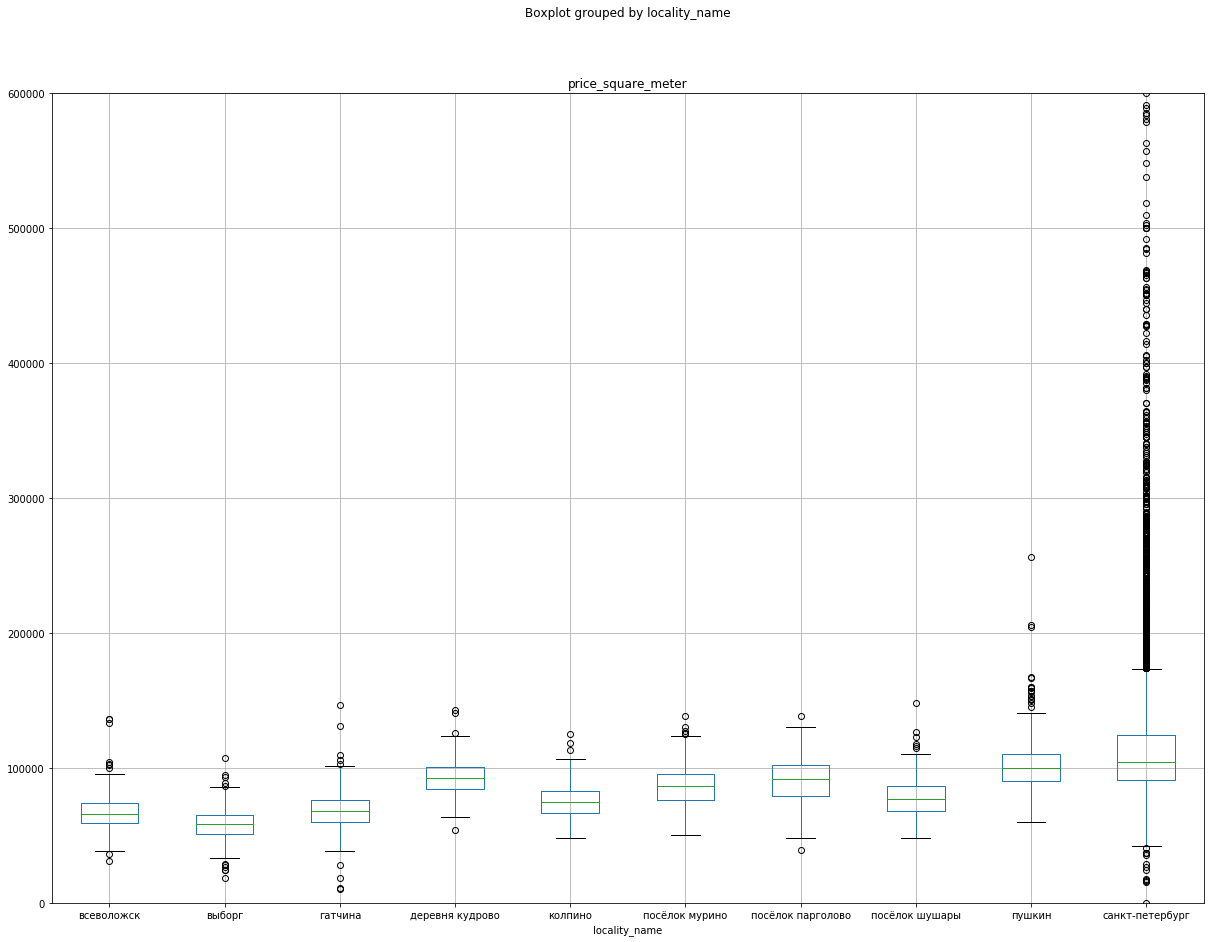

In [70]:
# строим диаграмму размаха насёленных пунктов
square_meter.boxplot('price_square_meter',by = 'locality_name', figsize=(20,15)).set_ylim(0,600000)

### Вывод: С самой высокой стоимость жилья - Санкт-Петербург
###               С самой низкой - Выборг 

# Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

In [108]:
name_city_Petersburg = 'санкт-петербург'
table_Petersburg = data_else.query('locality_name == @name_city_Petersburg')
# переводим метры в километры
table_Petersburg['Petersburg_center_km'] = (table_Petersburg['cityCenters_nearest'] / 1000).round()
# рассчитываем среднюю цену для каждого километра
table_Petersburg['price_km_center'] = (table_Petersburg['last_price'] / table_Petersburg['Petersburg_center_km']).round()
table_Petersburg[['cityCenters_nearest', 'Petersburg_center_km', 'price_km_center']].sample(15)

,cityCenters_nearest,Petersburg_center_km,price_km_center
1822,16268.0,16.0,437500.0
5959,15985.0,16.0,281250.0
8382,12291.0,12.0,1125000.0
11630,12217.0,12.0,525000.0
13943,8277.0,8.0,412500.0
17770,8605.0,9.0,477778.0
1513,16280.0,16.0,593750.0
21124,17279.0,17.0,245882.0
20093,6175.0,6.0,708333.0
10357,14969.0,15.0,413333.0


In [109]:
table_Petersburg['price_km_center'].isnull().sum(axis=0)
#48 пропусков, просто избавимся от них
table_Petersburg.dropna(subset=['price_km_center'], inplace=True)


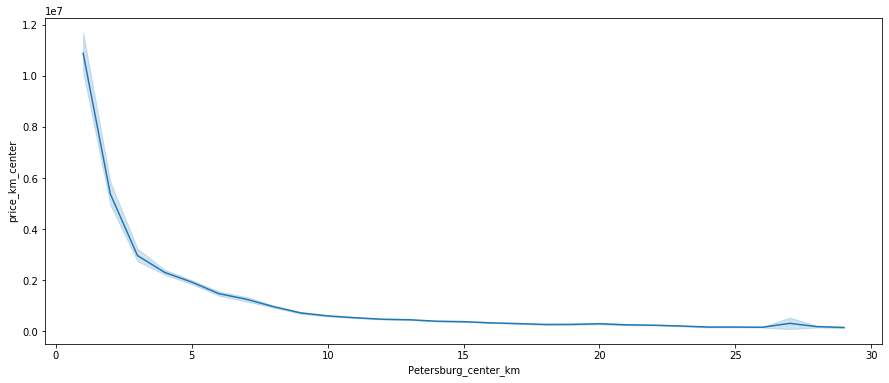

In [110]:
#table_Petersburg.plot(x = 'Petersburg_center_km', y = 'price_km_center', bins = 10, kind = 'hist', grid = True, figsize = (10,10))
plt.figure(figsize=(15, 6))
#строим график зависимости расстояния до центра города от средней цены  для каждого километра
sns.lineplot(x="Petersburg_center_km", y="price_km_center", data=table_Petersburg)

# Вывод: граница - 3 км

# Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

85.0

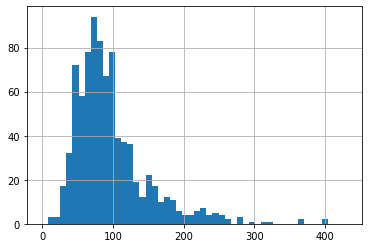

In [74]:
center_Petersburg = table_Petersburg.query('Petersburg_center_km <= 3')
#Peter = pd.pivot_table(data, columns =['ceiling_height', 'last_price', 'rooms', 'total_area'])
#Peter.sample(10)
center_Petersburg['total_area'].hist(bins = 50, range=(0, 430))
center_Petersburg['total_area'].median().round()

9700000.0

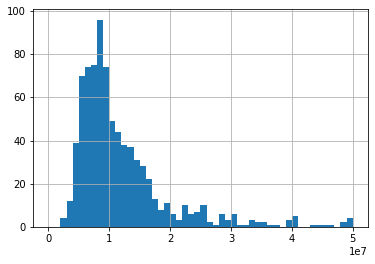

In [75]:
center_Petersburg['last_price'].hist(bins = 50, range=(0, 50000000))
center_Petersburg['last_price'].median()

3.0

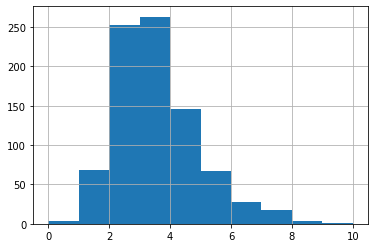

In [76]:
center_Petersburg['rooms'].hist(bins = 10, range=(0, 10))
center_Petersburg['rooms'].median()

3.0

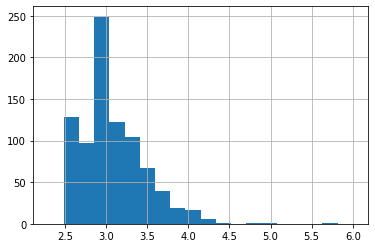

In [77]:
center_Petersburg['ceiling_height'].hist(bins = 20, range=(2.3, 6))
center_Petersburg['ceiling_height'].median()

### Вывод: В радиусе 3 км от центра Санкт-Петербурга больше всего квартир с следующими параметрами -  высота потолков 3 метра, трехкомнатные, 9700000 рублей,  площадь 85 м^2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001927D4179C8>,
      dtype=object)

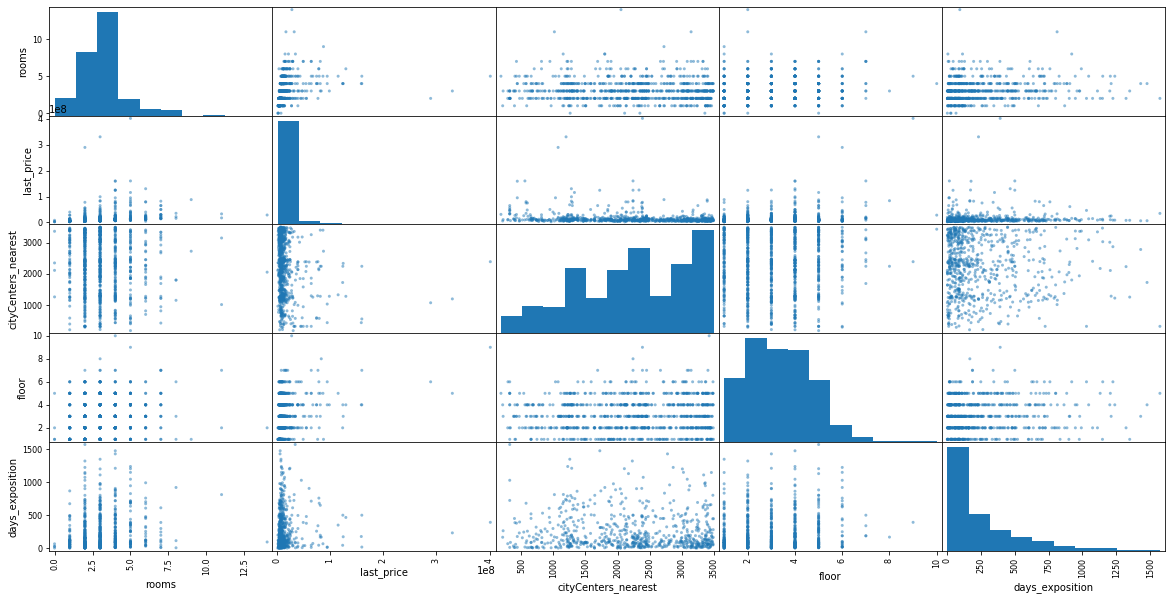

In [78]:
center_Petersburg_matrix = center_Petersburg[['rooms', 'last_price', 'cityCenters_nearest', 'floor', 'days_exposition']]
pd.plotting.scatter_matrix(center_Petersburg_matrix, figsize=(20, 10))

### Единственный параметр от которого зависит стоимость квартиры в центре Санкт-Петербурга из выбранных параметров выше является количество комнат, потому что цена зависит от площади, при чём квартиры с более чем с 6 комнатами не увеличиваются в цене, видимо потому что таких квартир мало и чем больше квадратных метров в квартире, тем дешевле квадратный метр.

(0, 80000000)

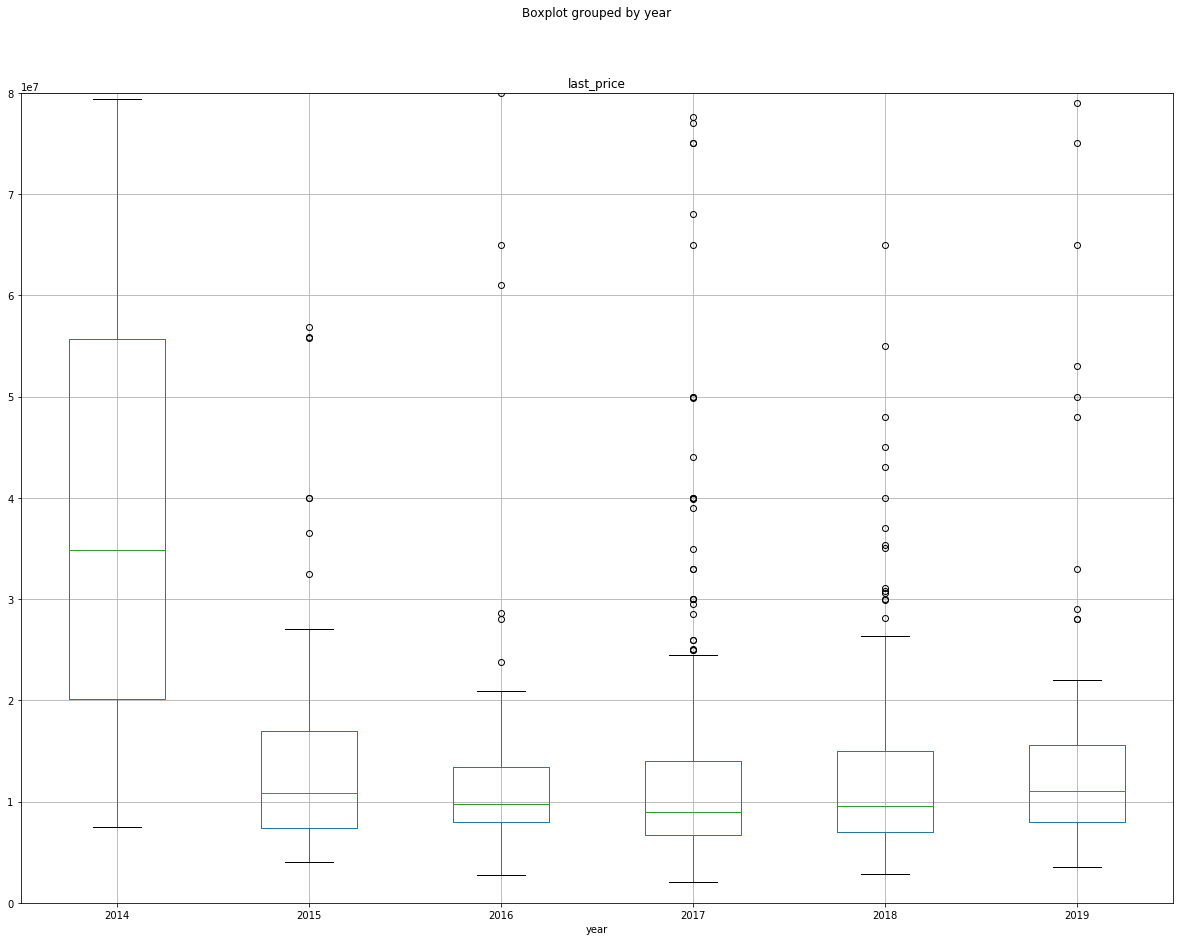

In [79]:
center_Petersburg.boxplot('last_price',by = 'year', figsize=(20,15)).set_ylim(0,80000000)

# Общие выводы по городу и по центру Питера похожи

# Шаг 5. Напишите общий вывод

  **Мы выяснили:**
 * стоимость квартиры зависит от этажа, чем выше этаж, тем выше цена
 * Квартиры в радиусе 3 км значительно дороже остальных
 * Цена квадратного метра уменьшается с увеличением общей площади квартиры
 * В среднем квартира снимается с объявления псоле 98 дней
 * от дня недели, месяца размещения объявления стоимость квартир не зависит
 * квартир с большой площадью в радиусе 3 км гораздо больше, чем за пределами
     

In [111]:
# функциядля сортировки центра Питера и всей выборки
def Peter_center(table):
    row = table['cityCenters_nearest']
    row_city = table['locality_name']
    if (row_city == 'санкт-петербург' and row <= 3000):
        return 'центр Питера'
    else:
        return 'остальная выборка'
data_else['centerSP_or_not'] = data_else[['cityCenters_nearest', 'locality_name']].apply(Peter_center, axis = 1)
        

In [112]:
# группируем данные по центру Питера или нет и применяем медианы к столбцам
data_SPnot_median =  data.groupby('centerSP_or_not').agg(last_price = ('last_price','median'), total_area = ('total_area', 'median'), floors_total = ('floors_total', 'median') )
#data_SPnot_median_else = data_SPnot_median.query('centerSP_or_not == "остальная выборка"')
#data_SPnot_median_center = data_SPnot_median.query('centerSP_or_not == "центр Питера"')
#data_SPnot_median['cor'] = (data_SPnot_median_center['last_price'] / data_SPnot_median_else['last_price']).map('{:.2f}'.format).astype(float)
#data_SPnot_median
data_SPnot_median.loc['cor'] = (data_SPnot_median.loc['остальная выборка'] / data_SPnot_median.loc['центр Питера']).map('{:.0%}'.format)
data_SPnot_median

,last_price,total_area,floors_total
centerSP_or_not,,,
остальная выборка,4600000,51,9
центр Питера,10050000,86.35,5
cor,46%,59%,180%


(0, 30000000)

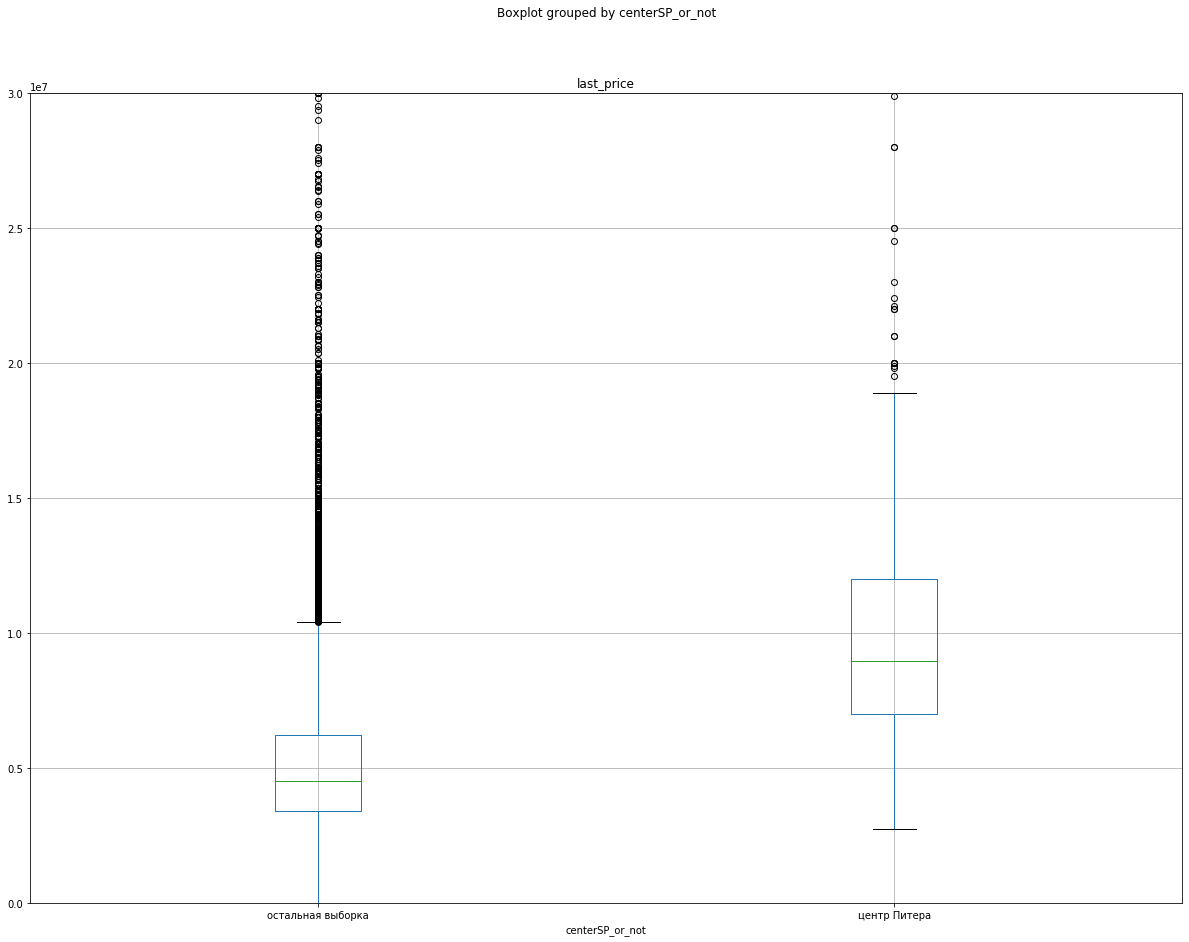

In [113]:
# диаграмма размаха, чтобы могли сравнить характеристику 'last_price'
data_else.boxplot('last_price',by = 'centerSP_or_not', figsize=(20,15)).set_ylim(0,30000000)

(0, 300)

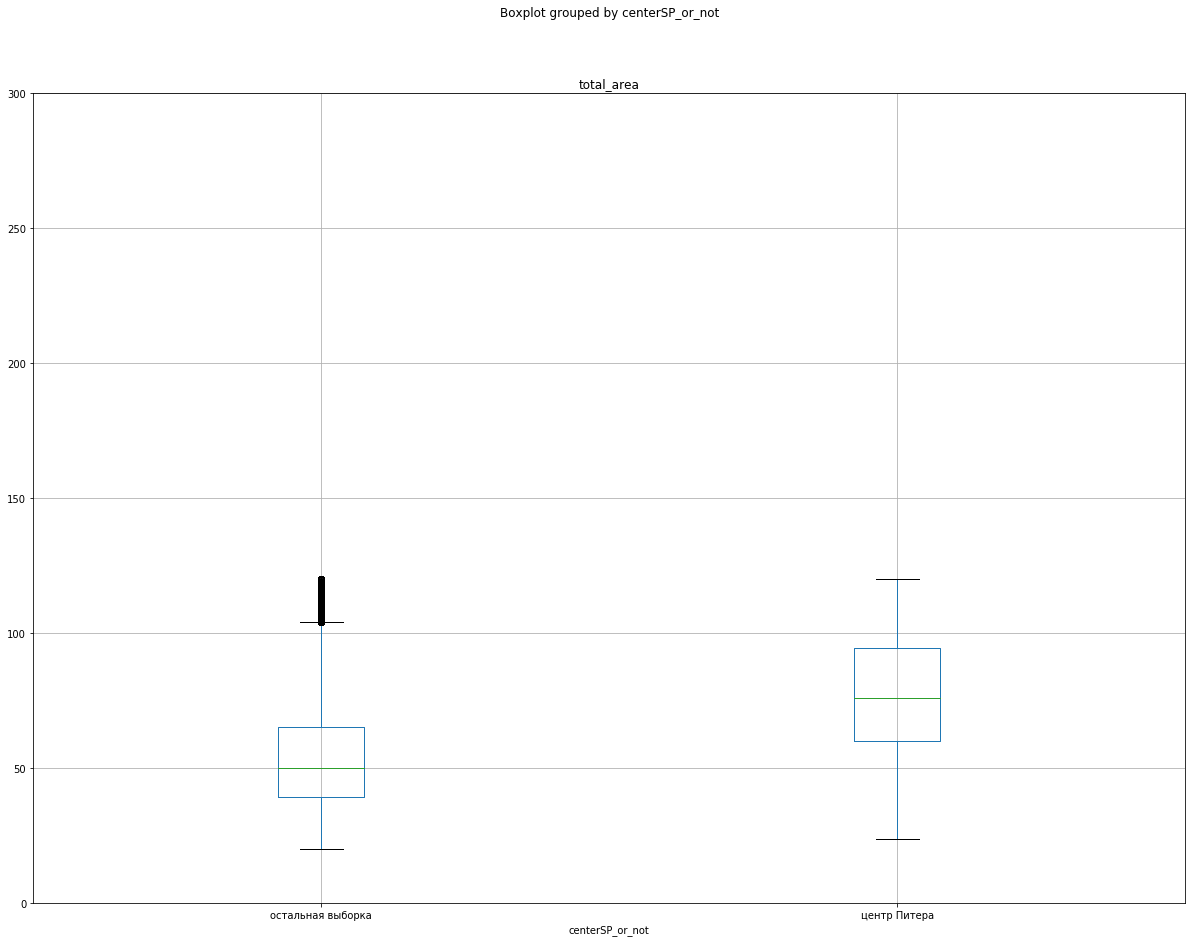

In [114]:
# диаграмма размаха, чтобы могли сравнить характеристику 'total_area'
data_else.boxplot('total_area',by = 'centerSP_or_not', figsize=(20,15)).set_ylim(0,300)

(0, 30)

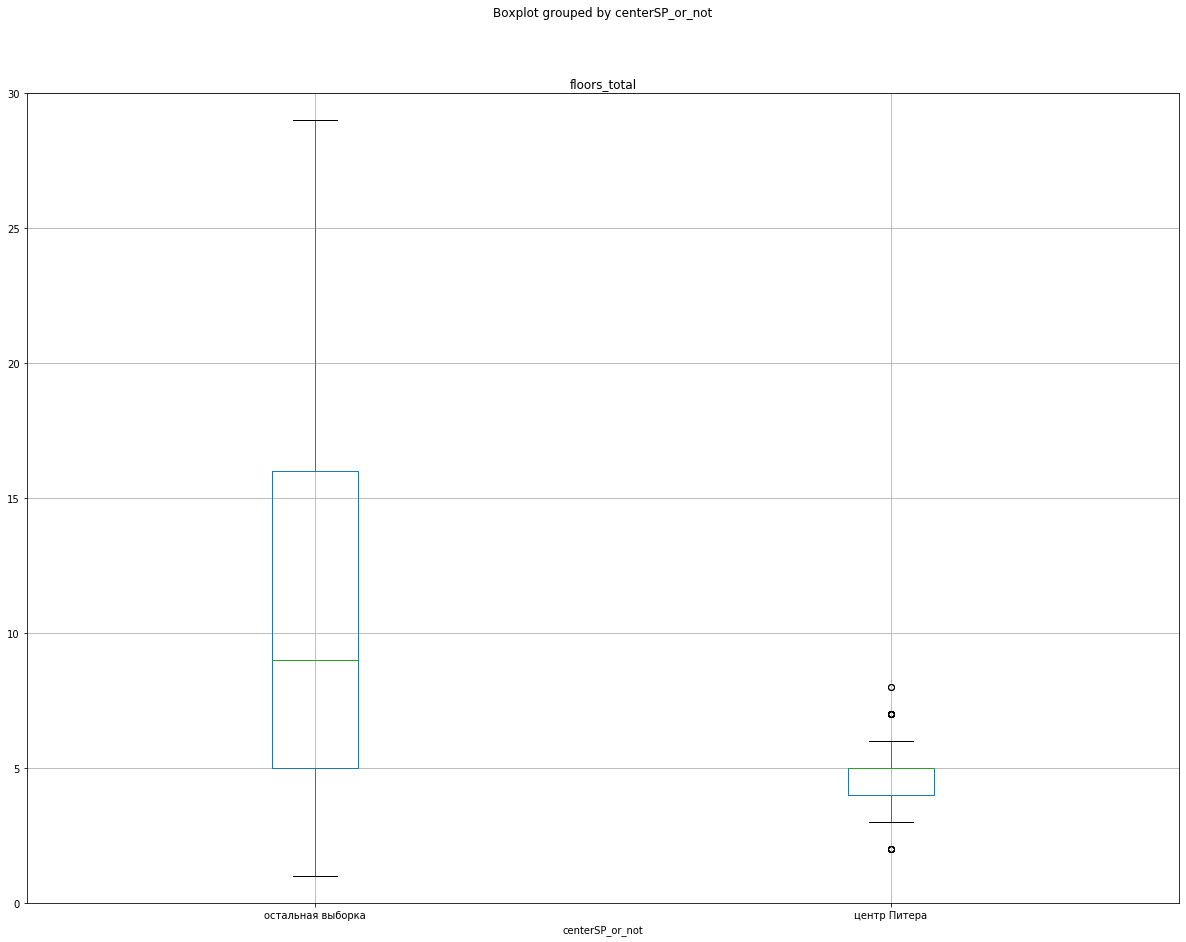

In [115]:
# диаграмма размаха, чтобы могли сравнить характеристику 'floors_total'
data_else.boxplot('floors_total',by = 'centerSP_or_not', figsize=(20,15)).set_ylim(0,30)

In [85]:
data_SPnot_median

,last_price,total_area,floors_total
centerSP_or_not,,,
остальная выборка,4600000,51,9
центр Питера,10050000,86.35,5
cor,46%,59%,180%



   По таблице выше мы можем определить, что по отношению медиан остальной выборки к центру Питера по параметру last_price равно 0.46, что значит квартиры в центре Питера по медиане на 54% дороже квартир в остальной выборке 



По таблице выше мы можем определить, что по отношению медиан остальной выборки к центру Питера по параметру 	total_area равно 0.59, что значит  площадь квартир в центре Питера по медиане на 41% больше квартир в остальной выборке

По таблице выше мы можем определить, что по отношению медиан остальной выборки к центру Питера по параметру 	floors_total равно 1.8, что значит  количество этажей в домах центра Питера по медиане на 180% меньше количества этажей в домах в остальной выборке 